<a href="https://colab.research.google.com/github/Nishit123-git/Face-Recognition/blob/main/Face_Recognition_by_Nishit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Face recognition system**

In [8]:
!pip install face_recognition

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 10.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566173 sha256=8db0f07283e598a52acd6fc2a0b4c130ffc2b111e9129d8535d80b9bc05622b5
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


In [9]:
!pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
!pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
!pip install pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **Mounting with my google drive**

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
import cv2
import numpy as np
from PIL import Image
import os
from google.colab.patches import cv2_imshow
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename
  

<IPython.core.display.Javascript object>

Saved to photo.jpg


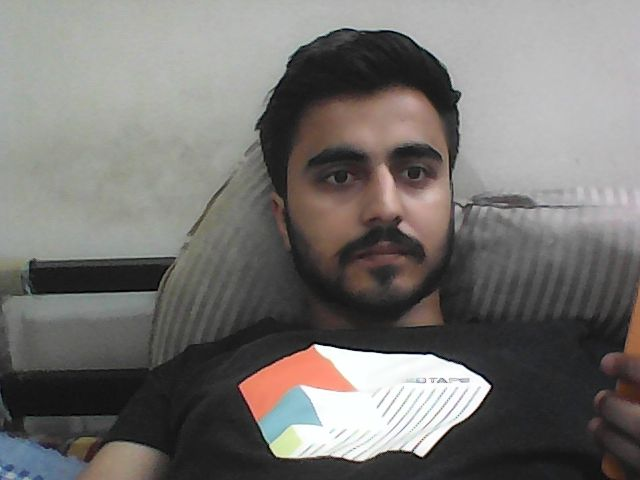

In [14]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

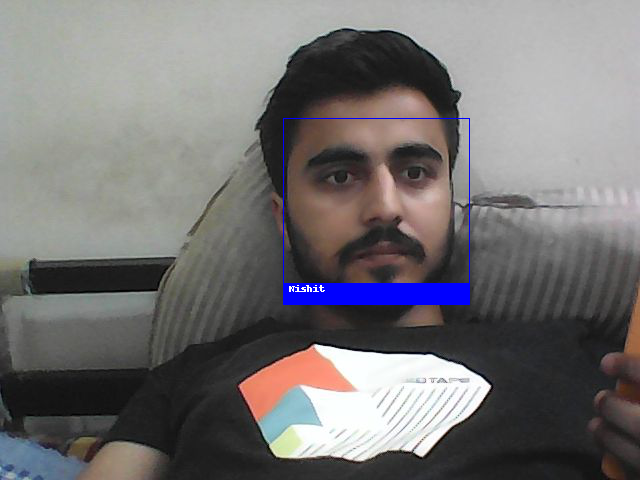

In [15]:
import face_recognition
import numpy as np
from PIL import Image, ImageDraw

# Create an empty dictionary to store the face encodings and names
known_faces = {}

# Function to add a new face to the known_faces dictionary
def add_face(name, image_path):
    image = face_recognition.load_image_file(image_path)
    face_encoding = face_recognition.face_encodings(image)[0]
    known_faces[name] = face_encoding

# Add faces to the known_faces dictionary
# Add faces to the known_faces dictionary
add_face("Barack Obama", "/content/drive/MyDrive/face/obama.jpg")
add_face("Lovnish", "/content/drive/MyDrive/face/lovnish1.jpeg")
add_face("Lovnish", "/content/drive/MyDrive/face/lovnish2.jpeg")
add_face("Lovnish", "/content/drive/MyDrive/face/lovnish3.jpeg")
add_face("Nishit", "/content/drive/MyDrive/face/nishit1.jpeg")
add_face("Nishit", "/content/drive/MyDrive/face/nishit2.jpeg")
add_face("Nishit", "/content/drive/MyDrive/face/nishit3.jpeg")
add_face("Nishit", "/content/drive/MyDrive/face/nishit4.jpg")
add_face("Nishit", "/content/drive/MyDrive/face/nishit5.jpg")
add_face("Nishit", "/content/drive/MyDrive/face/nishit6.jpg")
add_face("Joe Biden", "/content/drive/MyDrive/face/biden.jpg")
add_face("Trump", "/content/drive/MyDrive/face/trump.jpg")


# Load an image with an unknown face
unknown_image = face_recognition.load_image_file("/content/photo.jpg")

# Find all the faces and face encodings in the unknown image
face_locations = face_recognition.face_locations(unknown_image)
face_encodings = face_recognition.face_encodings(unknown_image, face_locations)

# Convert the image to a PIL-format image
pil_image = Image.fromarray(unknown_image)
draw = ImageDraw.Draw(pil_image)

# Loop through each face found in the unknown image
for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
    # See if the face is a match for any known faces
    matches = face_recognition.compare_faces(list(known_faces.values()), face_encoding)
    name = "Unknown"

    # Check if any match is found
    if True in matches:
        matched_index = matches.index(True)
        name = list(known_faces.keys())[matched_index]

    # Draw a box and label around the face
    draw.rectangle(((left, top), (right, bottom)), outline=(0, 0, 255))
    text_width, text_height = draw.textsize(name)
    draw.rectangle(((left, bottom - text_height - 10), (right, bottom)), fill=(0, 0, 255), outline=(0, 0, 255))
    draw.text((left + 6, bottom - text_height - 10), name, fill=(255, 255, 255, 255))

# Remove the drawing library from memory
del draw

# Display the resulting image
pil_image.show()